In [1]:
%matplotlib inline

In [2]:
# importing required libraries
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")

In [3]:
# absolute path till parent folder
abs_path = os.getcwd()
path_array = abs_path.split("/")
path_array = path_array[:len(path_array)-1]
homefolder_path = ""
for i in path_array[1:]:
    homefolder_path = homefolder_path + "/" + i 

In [4]:
# path to clean data
clean_data_path = (
    homefolder_path
    + "C:/Users/ishra/Downloads/VS Code/data-analysis-using-python-master/data-analysis-using-python-master/CleanData/CleanedDataSet/cleaned_autos.csv"
)

# reading csv into raw dataframe
df = pd.read_csv(clean_data_path, encoding="latin-1")

In [6]:
trial = []
for b in df["brand"].unique():
    for v in df["vehicleType"].unique():
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        trial.append({"brand": b, "vehicleType": v, "avgPrice": z})

trial = pd.DataFrame(trial)
trial = trial.reset_index(drop=True)

trial["avgPrice"].fillna(0, inplace=True)
trial["avgPrice"] = trial["avgPrice"].astype(int)

trial.head(5)

C:\Users\ishra\AppData\Local\Temp\ipykernel_3736\171125430.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trial["avgPrice"].fillna(0, inplace=True)


,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


## Average price of a vehicle by brand as well as vehicle type 

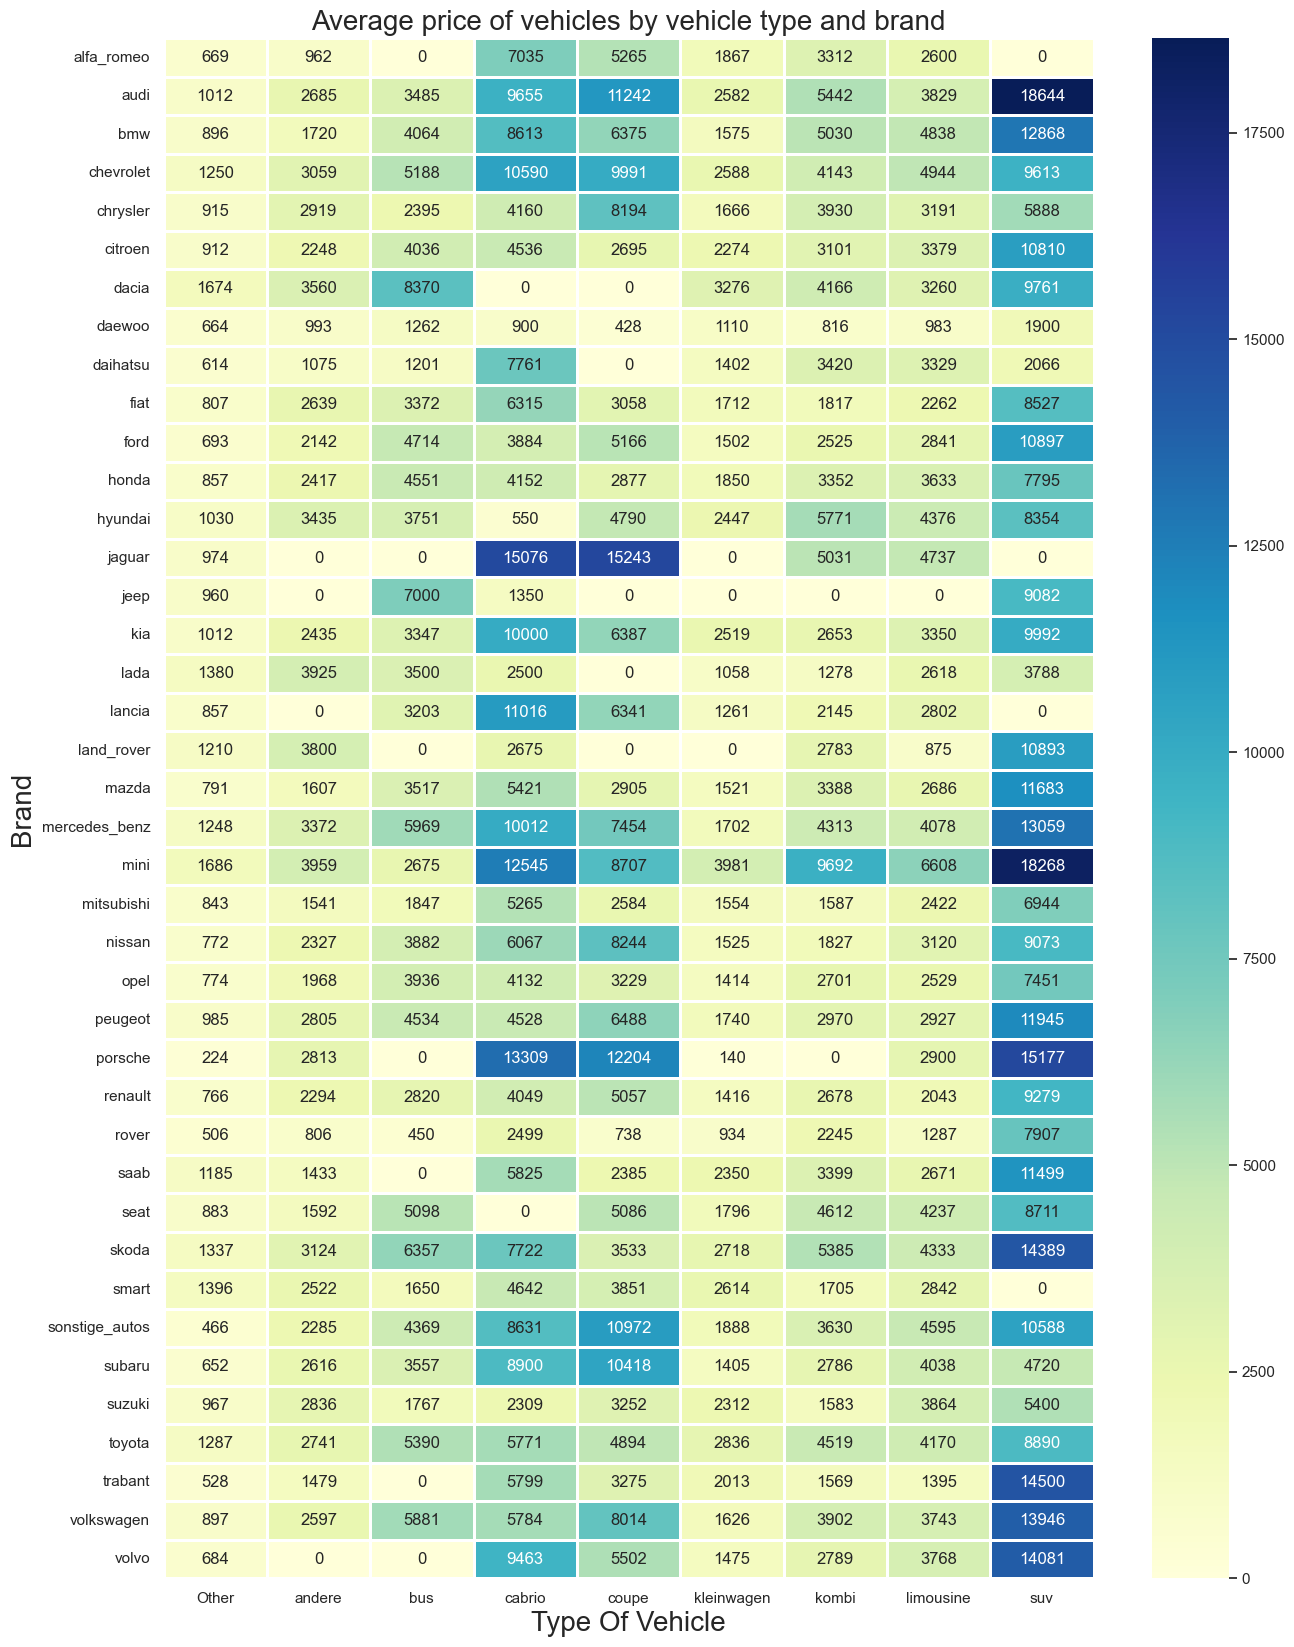

In [8]:
# HeatMap tp show average prices of vehicles by brand and type together
tri = trial.pivot(index="brand", columns="vehicleType", values="avgPrice")
fig, ax = plt.subplots(figsize=(15, 20))
sns.heatmap(tri, linewidths=1, cmap="YlGnBu", annot=True, ax=ax, fmt="d")
ax.set_title(
    "Average price of vehicles by vehicle type and brand", fontdict={"size": 20}
)
ax.xaxis.set_label_text("Type Of Vehicle", fontdict={"size": 20})
ax.yaxis.set_label_text("Brand", fontdict={"size": 20})
plt.show()

In [9]:
fig.savefig((abs_path + "/Plots/heatmap-price-brand-vehicleType.png"))

In [10]:
df.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5
